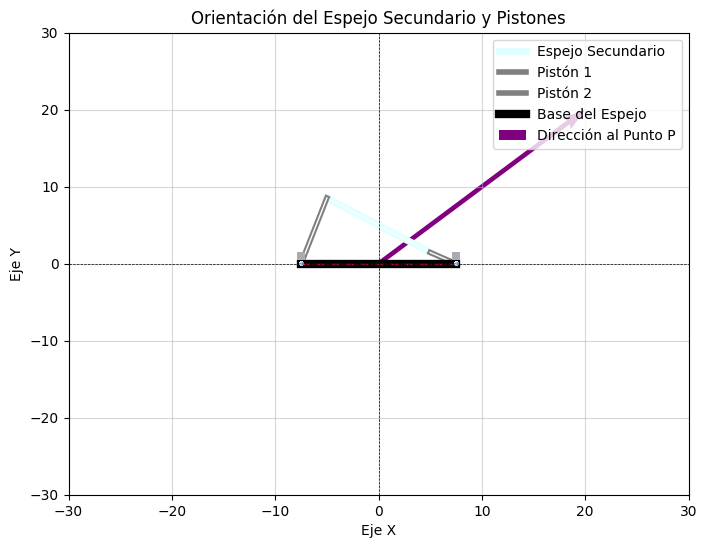

In [ ]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt

piston_image_path = "Assets/asset-espejo.png"
piston_image_path2 = "Assets/asset-gris.jpg"

def get_image(path, zoom):
    img = plt.imread(path)
    return OffsetImage(img, zoom=zoom)

# Ruta de la imagen del pistón con diferentes tamaños
piston_image_zoom = 0.009
piston_image_zoom2 = 0.0055

def calcular_angulo_paralelo(Px, Py):
    return np.arctan2(Py, Px)

def calcular_angulo_perpendicular(Px, Py):
    return np.arctan2(Px, -Py)

def calcular_pistones():
    try:
        # Obtener parámetros de entrada
        L = float(entry_L.get())
        B = float(entry_B.get())
        D = float(entry_D.get())
        dmax = float(entry_dmax.get())
        Px = float(entry_Px.get())
        Py = float(entry_Py.get())

        # Verificar que los valores sean válidos
        if L <= 0 or B <= 0 or D <= 0 or dmax <= 0:
            raise ValueError("Todos los valores deben ser mayores que cero.")

        # Verificar restricciones
        if D > dmax:
            raise ValueError("La longitud mínima de los pistones debe ser menor que la máxima.")
        
        # Calcular el ángulo de orientación del espejo perpendicular al punto P
        theta = calcular_angulo_perpendicular(Px, Py)
        
        # Calcular las longitudes de los pistones
        x1 = D + (L / 2) * np.sin(theta)
        x2 = D - (L / 2) * np.sin(theta)

        # Mostrar resultados en la interfaz
        result_x1.set(f"x1 (Pistón 1): {x1:.2f}")
        result_x2.set(f"x2 (Pistón 2): {x2:.2f}")

        # Llamar a la función para graficar
        graficar(L, B, Px, Py, theta, x1, x2)
    except ValueError as e:
        messagebox.showerror("Error", str(e))
        messagebox.showerror("Error", f"Por favor, ingrese valores válidos. Detalles del error: {str(e)}")
    except ValueError as e:
        messagebox.showerror("Error", str(e))
    except Exception:
        messagebox.showerror("Error", "Por favor, ingrese valores válidos.")

def graficar(L, B, Px, Py, theta, x1, x2):
    plt.figure(figsize=(8, 6))

    # Coordenadas de los extremos del espejo
    mirror_x = [-L / 2, L / 2]
    mirror_y = [x1, x2]

    # Coordenadas de la base
    base_x = [-B / 2, B / 2]
    base_y = [0, 0]

    # Coordenadas de los pistones dinámicos
    piston1_x = [base_x[0], mirror_x[0]]  # Conectar el extremo izquierdo de la base con el extremo izquierdo del espejo
    piston1_y = [base_y[0], mirror_y[0]]  # Coordenadas verticales dinámicas
    piston2_x = [base_x[1], mirror_x[1]]  # Conectar el extremo derecho de la base con el extremo derecho del espejo
    piston2_y = [base_y[1], mirror_y[1]]

    # Dibujar el espejo secundario
    plt.plot(mirror_x, mirror_y, label="Espejo Secundario", color="lightcyan", linewidth=5)
    plt.plot(mirror_x, mirror_y, color="azure", linewidth=2)

    # Dibujar la imagen del pistón en las posiciones inferiores de los pistones
    imagebox3 = AnnotationBbox(get_image(piston_image_path, piston_image_zoom), (-B / 2, 0), frameon=False)
    imagebox4 = AnnotationBbox(get_image(piston_image_path, piston_image_zoom), (B / 2, 0), frameon=False)
    plt.gca().add_artist(imagebox3)
    plt.gca().add_artist(imagebox4)

    # Dibujar la imagen del pistón en las posiciones inferiores de los pistones
    imagebox3 = AnnotationBbox(get_image(piston_image_path2, piston_image_zoom2), (-B / 2, 1), frameon=False)
    imagebox4 = AnnotationBbox(get_image(piston_image_path2, piston_image_zoom2), (B / 2, 1), frameon=False)
    plt.gca().add_artist(imagebox3)
    plt.gca().add_artist(imagebox4)

    # Dibujar los pistones inclinados
    plt.plot(piston1_x, piston1_y, linestyle="solid", linewidth=4, color="gray", label="Pistón 1")
    plt.plot(piston2_x, piston2_y, linestyle="solid", linewidth=4, color="gray", label="Pistón 2")
    plt.plot(piston1_x, piston1_y, linestyle="solid", linewidth=1, color="white")
    plt.plot(piston2_x, piston2_y, linestyle="solid", linewidth=1, color="white")

    # Dibujar la base del espejo
    plt.plot(base_x, base_y, linewidth=6, color="black", label="Base del Espejo")
    plt.plot(base_x, base_y, linewidth=1, linestyle="-.", color="crimson")

    # Dibujar la línea hacia el punto P
    plt.quiver(0, 0, Px, Py, angles='xy', scale_units='xy', scale=1, color="purple", label="Dirección al Punto P")

    # Configuración de la gráfica
    plt.title("Orientación del Espejo Secundario y Pistones")
    plt.ylim(-30, 30)
    plt.xlim(-30, 30)
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()

# Crear ventana principal
root = tk.Tk()
root.title("Cálculo de Pistones para Enfoque del Telescopio")

# Variables de entrada
entry_L = tk.StringVar()
entry_B = tk.StringVar()
entry_D = tk.StringVar()
entry_dmax = tk.StringVar()
entry_Px = tk.StringVar()
entry_Py = tk.StringVar()

# Variables de salida
result_x1 = tk.StringVar()
result_x2 = tk.StringVar()

# Crear interfaz gráfica
tk.Label(root, text="Largo del Espejo (L):").grid(row=0, column=0, padx=5, pady=5)
tk.Entry(root, textvariable=entry_L).grid(row=0, column=1, padx=5, pady=5)

tk.Label(root, text="Separación de Pistones (B):").grid(row=1, column=0, padx=5, pady=5)
tk.Entry(root, textvariable=entry_B).grid(row=1, column=1, padx=5, pady=5)

tk.Label(root, text="Longitud Mínima de Pistones (D):").grid(row=2, column=0, padx=5, pady=5)
tk.Entry(root, textvariable=entry_D).grid(row=2, column=1, padx=5, pady=5)

tk.Label(root, text="Longitud Máxima de Pistones (dmax):").grid(row=3, column=0, padx=5, pady=5)
tk.Entry(root, textvariable=entry_dmax).grid(row=3, column=1, padx=5, pady=5)

tk.Label(root, text="Coordenada X del Punto P:").grid(row=4, column=0, padx=5, pady=5)
tk.Entry(root, textvariable=entry_Px).grid(row=4, column=1, padx=5, pady=5)

tk.Label(root, text="Coordenada Y del Punto P:").grid(row=5, column=0, padx=5, pady=5)
tk.Entry(root, textvariable=entry_Py).grid(row=5, column=1, padx=5, pady=5)

tk.Button(root, text="Calcular", command=calcular_pistones).grid(row=6, column=0, columnspan=2, pady=10)

# Mostrar resultados
tk.Label(root, textvariable=result_x1, fg="blue").grid(row=7, column=0, columnspan=2)
tk.Label(root, textvariable=result_x2, fg="green").grid(row=8, column=0, columnspan=2)

# Iniciar la aplicación
root.mainloop()